In [5]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
from IPython.display import clear_output
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV


def RMSE(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
def MAPE(Y_Predicted,Y_actual):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

#chargement des variables et supression des samples défectueux
variables = pickle.load(open(r'jeu_variables_mmm.pkl','rb'))
entetes = np.array(variables['X']).reshape(22,141)[:,0]
X = np.array(variables['X']).reshape(22,141)[:,1:141].T.astype('float')
Y = np.array(variables['Y']).reshape(140).astype('float')
remove_bat = [8, 10, 12, 13, 22, 96, 117, 126, 136, 137]
X_clean = np.delete(X, remove_bat, 0)
Y_clean = np.delete(Y, remove_bat)
X = X_clean
Y = Y_clean
index_valeurs_faibles = np.where(Y < 350)
index_valeurs_fortes = np.where(Y > 1350)
index_a_enlever = np.concatenate((index_valeurs_faibles, index_valeurs_fortes), axis=None)
X = np.delete(X, index_a_enlever, 0)
Y = np.delete(Y, index_a_enlever)

#classification des samples en fonction de la durée de vie
Y = Y//330

#from sklearn.model_selection import train_test_split
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, shuffle=True, test_size=1/3, stratify=Y)
#X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, shuffle=True, test_size=1/2, stratify=Y_train)

def normalize_val(X_train, X_test, X_val):
    sc = StandardScaler(with_mean=True, with_std=True)
    sc.fit(X_train)
    X_train_n = sc.transform(X_train)
    X_val_n = sc.transform(X_val)
    X_test_n = sc.transform(X_test)
    return sc, X_train_n, X_test_n, X_val_n

def normalize_all(X):
    sc = StandardScaler(with_mean=True, with_std=True)
    sc.fit(X)
    X_n = sc.transform(X)
    return sc, X_n

#sc_x,  X_train_n, X_test_n, X_val_n = normalize_val(X_train , X_test, X_val)
sc, X_n = normalize_all(X)

In [9]:
#SVC linear, sur toutes les données
C_grid = np.logspace(-2, 0, 100)

# the grid
parameters = [{"C": C_grid}]
# the classifier
clf_svm = SVC(kernel="linear", tol=0.01)
# Perf a K-fold validation using the accuracy as the performance measure
K = 5
# we will dot it on a grid search using n_jobs processors
clf_svm = GridSearchCV(clf_svm, param_grid=parameters, cv=K, scoring="accuracy", verbose=1, n_jobs = 2)
clf_svm.fit(X_n, Y)

print("\n linear kernel - optimal hyper-parameters = {}".format(clf_svm.
best_params_))

Fitting 5 folds for each of 100 candidates, totalling 500 fits

 linear kernel - optimal hyper-parameters = {'C': 0.1484968262254465}


In [ ]:
#séparation du jeu de données pour obtenir un jeu de test

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, shuffle=True, test_size=1/2, stratify=Y)

Accuracy on training data = 88.33333333333333
Accuracy on test data = 86.88524590163934


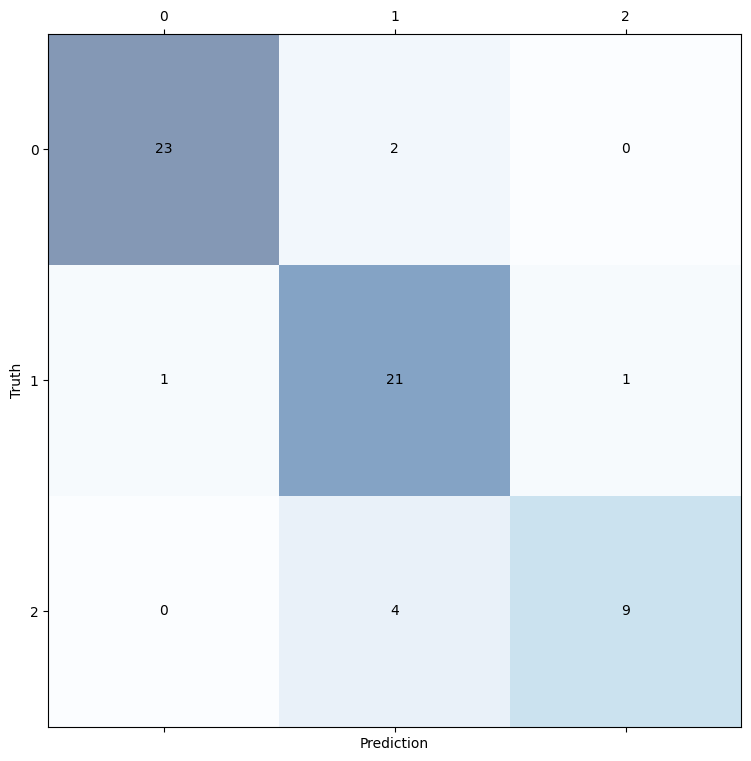

In [13]:
X_test_n = sc.transform(X_test)
X_train_n = sc.transform(X_train)

acc_test = accuracy_score(Y_test, clf_svm.predict(X_test_n))
acc_train = accuracy_score(Y_train, clf_svm.predict(X_train_n))
print("Accuracy on training data = {}".format(100*acc_train))
print("Accuracy on test data = {}".format(100*acc_test))

from sklearn.metrics import confusion_matrix, accuracy_score
Ytest_pred_svm = clf_svm.predict(X_test_n)
confmat = confusion_matrix(Y_test, Ytest_pred_svm)
fig, ax = plt.subplots(figsize=(9, 9))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.5)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va="center", ha="center")
plt.xlabel("Prediction"); plt.ylabel("Truth");